### 1.	Implement the CartPole for a Certain Number of Steps

In [5]:
!pip install gymnasium

Defaulting to user installation because normal site-packages is not writeable


In [7]:
! pip install gymnasium[classic-control]

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import gymnasium as gym
env = gym.make("CartPole-v1",render_mode = 'human')
state,info = env.reset()

In [9]:
state#all values of the obesrvation space

array([-0.03096148,  0.01475775,  0.00961725,  0.02913416], dtype=float32)

In [10]:
env.action_space#actions to take

Discrete(2)

In [11]:
env.observation_space#range of observation space values

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

In [17]:
#implementing for certain number of steps
steps = 50
done = False
truncated = False
obs,info = env.reset()
cum_reward = 0
for i in range(steps):
    while not done and not truncated:
        #take random action
        action = env.action_space.sample()
        state,reward,done,truncated,info = env.step(action)
        cum_reward += reward
        env.render()
env.close()

In [23]:
print(f"Cumulative reward is {cum_reward}")

Cumulative reward is 20.0


### 1.	Implement the  Mountain Car Environment for a Certain Number of Steps

In [19]:
mou_env = gym.make("MountainCar-v0",render_mode = 'human')
state,info = mou_env.reset()

In [20]:
state

array([-0.5894194,  0.       ], dtype=float32)

In [21]:
mou_env.action_space

Discrete(3)

In [22]:
mou_env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [24]:
steps = 50
done = False
truncated = False
obs,info = mou_env.reset()
cum_reward = 0
for i in range(steps):
    while not done and not truncated:
        #take random action
        action = mou_env.action_space.sample()
        state,reward,done,truncated,info = mou_env.step(action)
        cum_reward += reward
        mou_env.render()
mou_env.close()

In [25]:
print(f"Cumulative reward is {cum_reward}")

Cumulative reward is -200.0


### 2.	Implement the CartPole  Environment for a Certain Number of Episodes

In [26]:
env = gym.make("CartPole-v1",render_mode = 'human')
state,info = env.reset()

In [28]:
episodes = 50
episode_reward = []
for i in range(episodes):
    obs,info = env.reset()#reset env for every episode
    done = False
    truncated = False
    cum_reward = 0
    while not done and not truncated:
        action = env.action_space.sample()
        state,reward,done,truncated,info = env.step(action)
        cum_reward += reward
    episode_reward.append(cum_reward)
env.close()

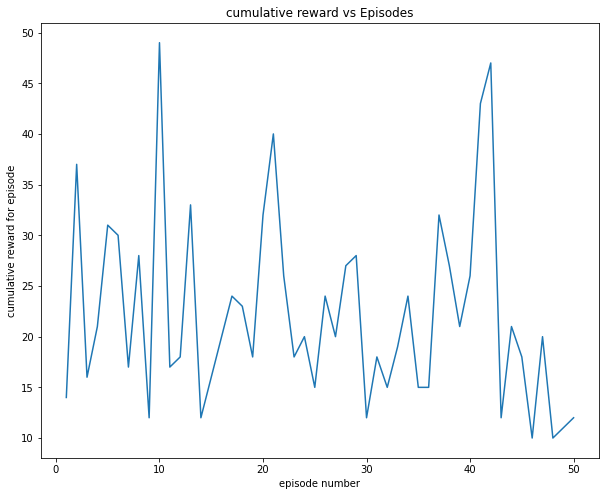

In [29]:
#now plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,51),episode_reward)
plt.xlabel("episode number")
plt.ylabel("cumulative reward for episode")
plt.title("cumulative reward vs Episodes")
plt.show()

### 2.	Implement the MountainCar  Environment for a Certain Number of Episodes

In [30]:
mou_env = gym.make("MountainCar-v0",render_mode = 'human')
state,info = mou_env.reset()

In [31]:
episodes = 50
episode_reward = []
for i in range(episodes):
    obs,info = mou_env.reset()#reset env for every episode
    done = False
    truncated = False
    cum_reward = 0
    while not done and not truncated:
        action = mou_env.action_space.sample()
        state,reward,done,truncated,info = mou_env.step(action)#in mountain car taking random is not good(make policy on own and move based on velocity and position)
        cum_reward += reward
    episode_reward.append(cum_reward)
mou_env.close()

In [ ]:
#now plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,51),episode_reward)
plt.xlabel("episode number")
plt.ylabel("cumulative reward for episode")
plt.title("cumulative reward vs Episodes")
plt.show()

### 3.	Breadth-First Search (BFS)

In [40]:
from collections import deque
def Breadth_First_Search(source,target,graph):
    frontier = deque([source])#init with source
    explored = set()
    while frontier:
        node = frontier.popleft()#get the top node
        if node == target:
            return True
        for neighbour_node in graph[node]:#expecting adjacency list
            #for each neighbour node if not in explored then mark and put to queu
            if neighbour_node not in explored:
                explored.add(neighbour_node)
                frontier.append(neighbour_node)
    return False

In [41]:
graph = [
    [1,2,3],
    [2],
    [0],
]#mock adjacency list representation of graph
source = 0
target = 2
result = Breadth_First_Search(source,target,graph)
print(result)

True


### 4.Depth-First Search(DFS)

In [42]:
def Depth_First_Search(source,target,graph):
    stack = [source]
    explored = set()
    while stack:
        node =stack.pop()#pop the top one
        if node == target:
            return True
        for neighbour_node in graph[node]:#expecting adjacency list
            #for each neighbour node if not in explored then mark and put to queu
            if neighbour_node not in explored:
                explored.add(neighbour_node)
                frontier.append(neighbour_node)
    return False

In [44]:
graph = [
    [1,2],
    [2],
    [0],
]#mock adjacency list representation of graph
source = 0
target = 3
result = Breadth_First_Search(source,target,graph)
print(result)

False


### 5.	Theta Policy (CartPole)

In [45]:
env = gym.make("CartPole-v1")
#reseting the enironment
state, info = env.reset()

In [46]:
num_of_episodes = 100
theta_rewards = []

In [47]:
import time
for i in range(num_of_episodes):
    observation,info = env.reset()#get all the state and info and all
    total_reward = 0
    done = False
    
    while not done:
        env.render()
        theta = observation[2] #get the current value of theta
        action = 0 if theta<0 else 1 #0->push to left 1-> push to right(action shd be 0 or 1)
        observation,reward,done,_,_ = env.step(action)
        total_reward +=reward
    
    theta_rewards.append(total_reward)
    print(f"Theta policy -> Episode {i+1}: Reward = {total_reward} \n")
    time.sleep(1)

C:\Users\mca\AppData\Roaming\Python\Python39\site-packages\gymnasium\envs\classic_control\cartpole.py:250: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Theta policy -> Episode 1: Reward = 52.0 

Theta policy -> Episode 2: Reward = 56.0 

Theta policy -> Episode 3: Reward = 41.0 

Theta policy -> Episode 4: Reward = 31.0 

Theta policy -> Episode 5: Reward = 50.0 

Theta policy -> Episode 6: Reward = 40.0 

Theta policy -> Episode 7: Reward = 41.0 

Theta policy -> Episode 8: Reward = 38.0 

Theta policy -> Episode 9: Reward = 39.0 

Theta policy -> Episode 10: Reward = 35.0 

Theta policy -> Episode 11: Reward = 25.0 

Theta policy -> Episode 12: Reward = 35.0 

Theta policy -> Episode 13: Reward = 61.0 

Theta policy -> Episode 14: Reward = 42.0 

Theta policy -> Episode 15: Reward = 45.0 

Theta policy -> Episode 16: Reward = 25.0 

Theta policy -> Episode 17: Reward = 47.0 

Theta policy -> Episode 18: Reward = 24.0 

Theta policy -> Episode 19: Reward = 49.0 

Theta policy -> Episode 20: Reward = 61.0 

Theta policy -> Episode 21: Reward = 52.0 

Theta policy -> Episode 22: Reward = 63.0 

Theta policy -> Episode 23: Reward = 46.0

### 6.	Omega Policy (CartPole)

In [49]:
omega_rewards = []
import time
for i in range(num_of_episodes):
    observation,info = env.reset()#get all the state and info and all
    total_reward = 0
    done = False
    
    while not done:
        env.render()
        omega = observation[3] #get the current value of theta
        action = 0 if omega<0 else 1 #0->push to left 1-> push to right(action shd be 0 or 1)
        observation,reward,done,_,_ = env.step(action)
        total_reward +=reward
    
    omega_rewards.append(total_reward)
    print(f"Omega policy -> Episode {i+1}: Reward = {total_reward} \n")
    time.sleep(1)

Theta policy -> Episode 1: Reward = 239.0 

Theta policy -> Episode 2: Reward = 141.0 

Theta policy -> Episode 3: Reward = 260.0 

Theta policy -> Episode 4: Reward = 246.0 

Theta policy -> Episode 5: Reward = 154.0 

Theta policy -> Episode 6: Reward = 236.0 

Theta policy -> Episode 7: Reward = 236.0 

Theta policy -> Episode 8: Reward = 202.0 

Theta policy -> Episode 9: Reward = 262.0 

Theta policy -> Episode 10: Reward = 142.0 

Theta policy -> Episode 11: Reward = 240.0 

Theta policy -> Episode 12: Reward = 212.0 

Theta policy -> Episode 13: Reward = 154.0 

Theta policy -> Episode 14: Reward = 151.0 

Theta policy -> Episode 15: Reward = 185.0 

Theta policy -> Episode 16: Reward = 248.0 

Theta policy -> Episode 17: Reward = 231.0 

Theta policy -> Episode 18: Reward = 177.0 

Theta policy -> Episode 19: Reward = 227.0 

Theta policy -> Episode 20: Reward = 154.0 

Theta policy -> Episode 21: Reward = 139.0 

Theta policy -> Episode 22: Reward = 219.0 

Theta policy -> Epi

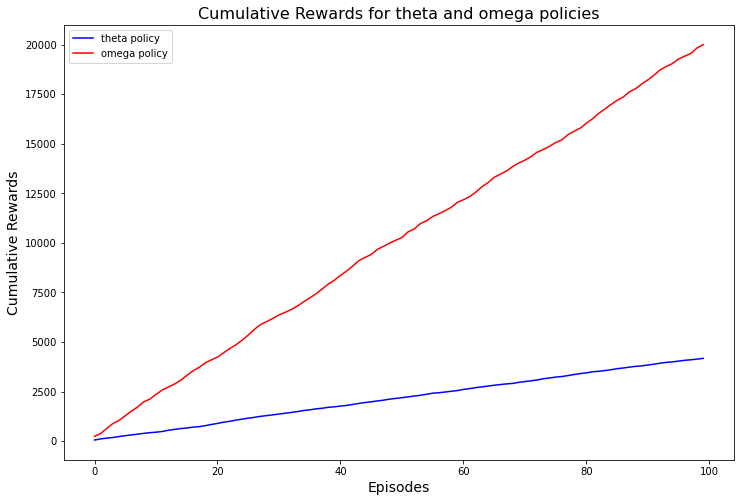

In [50]:
import matplotlib.pyplot as plt

#taking cumulative
cumulative_reward_theta = [sum(theta_rewards[:i+1]) for i in range(len(theta_rewards))]
cumulative_reward_omega = [sum(omega_rewards[:i+1]) for i in range(len(omega_rewards))]

plt.figure(figsize=(12, 8))
# Plotting both policies with proper labels for the legend
plt.plot(cumulative_reward_theta, color='b', label="theta policy")
plt.plot(cumulative_reward_omega, color='r', label='omega policy')

# Title and axis labels
plt.title("Cumulative Rewards for theta and omega policies", fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel("Cumulative Rewards", fontsize=14)

# Adding the legend
plt.legend()

# Display the plot
plt.show()


In [51]:
import numpy as np
avg = np.average(cumulative_reward_theta)
std = np.std(cumulative_reward_theta)
print(f"theta policy -> average:{avg} and standard deviation:{std}")

theta policy -> average:2151.35 and standard deviation:1212.5991206907581


In [52]:
import numpy as np
avg = np.average(cumulative_reward_omega)
std = np.std(cumulative_reward_omega)
print(f"omega policy -> average:{avg} and standard deviation:{std}")

omega policy -> average:10159.41 and standard deviation:5721.743868952891


### 7.	Simple Hill Climbing

In [53]:
import gymnasium as gym
import numpy as np

def simple_hill_climbing(env, max_steps=1000):
    state, _ = env.reset()  # Reset the environment to start a new episode
    best_reward = -float('inf')
    best_action = None
    action_space = env.action_space.n  # Number of possible actions (in MountainCar, it is 3)
    
    for step in range(max_steps):
        # Try all possible actions to find the best reward
        best_next_state = None
        best_next_reward = -float('inf')
        best_next_action = None
        
        for action in range(action_space):
            next_state, reward, done, _, _ = env.step(action)
            if reward > best_next_reward:
                best_next_state = next_state
                best_next_reward = reward
                best_next_action = action
                
        # If we have a better reward, update the state and action
        if best_next_reward > best_reward:
            best_reward = best_next_reward
            best_action = best_next_action
            state = best_next_state
        else:
            break  # Stop if no improvement in reward
        
        # Render the environment to visualize (optional)
        env.render()
        
        if done:
            print(f"Goal reached in {step} steps!")
            break
        
    return best_reward, step


# Initialize the environment
env = gym.make('MountainCar-v0')

# Run the Simple Hill Climbing algorithm
best_reward, total_steps = simple_hill_climbing(env)

print(f"Best reward: {best_reward}, total steps taken: {total_steps}")

# Close the environment after the run
env.close()


Best reward: -1.0, total steps taken: 1


C:\Users\mca\AppData\Roaming\Python\Python39\site-packages\gymnasium\envs\classic_control\mountain_car.py:179: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


### 8.	Stochastic Hill Climbing

In [54]:
import gymnasium as gym
import numpy as np
import random

def stochastic_hill_climbing(env, max_steps=1000):
    state, _ = env.reset()  # Reset the environment to start a new episode
    best_reward = -float('inf')
    best_action = None
    action_space = env.action_space.n  # Number of possible actions (in MountainCar, it is 3)
    
    for step in range(max_steps):
        # Stochastic Hill Climbing: Randomly choose an action from the action space
        action = random.randint(0, action_space - 1)
        next_state, reward, done, _, _ = env.step(action)
        
        # If the reward from this action is better, update the best action and state
        if reward > best_reward:
            best_reward = reward
            best_action = action
            state = next_state
        
        # Render the environment to visualize (optional)
        env.render()
        
        if done:
            print(f"Goal reached in {step} steps!")
            break
        
    return best_reward, step


# Initialize the environment
env = gym.make('MountainCar-v0')

# Run the Stochastic Hill Climbing algorithm
best_reward, total_steps = stochastic_hill_climbing(env)

print(f"Best reward: {best_reward}, total steps taken: {total_steps}")

# Close the environment after the run
env.close()


Best reward: -1.0, total steps taken: 999


### 9.	Steepest Ascent Hill Climbing

In [55]:
import gymnasium as gym
import numpy as np

def steepest_ascent_hill_climbing(env, max_steps=1000):
    state, _ = env.reset()  # Reset the environment to start a new episode
    best_reward = -float('inf')
    best_action = None
    action_space = env.action_space.n  # Number of possible actions (in MountainCar, it is 3)
    
    for step in range(max_steps):
        best_next_state = None
        best_next_reward = -float('inf')
        best_next_action = None
        
        # Steepest-Ascent Hill Climbing: Evaluate all possible actions
        for action in range(action_space):
            next_state, reward, done, _, _ = env.step(action)
            if reward > best_next_reward:
                best_next_state = next_state
                best_next_reward = reward
                best_next_action = action
        
        # If the best reward from the evaluated actions is better, update state and action
        if best_next_reward > best_reward:
            best_reward = best_next_reward
            best_action = best_next_action
            state = best_next_state
        else:
            break  # Stop if no improvement in reward
        
        # Render the environment to visualize (optional)
        env.render()
        
        if done:
            print(f"Goal reached in {step} steps!")
            break
        
    return best_reward, step


# Initialize the environment
env = gym.make('MountainCar-v0')

# Run the Steepest-Ascent Hill Climbing algorithm
best_reward, total_steps = steepest_ascent_hill_climbing(env)

print(f"Best reward: {best_reward}, total steps taken: {total_steps}")

# Close the environment after the run
env.close()


Best reward: -1.0, total steps taken: 1
